In [1]:
import numpy as np
import sys
sys.path.insert(1, '../utilities/')

from TS_utils import TS_generator
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ts_generator = TS_generator(nb_timeseries=10000, chunk_size=20)

In [3]:
X = ts_generator.get_array()

In [4]:
X.shape

(10000, 20)

In [7]:
X[0,:]

array([34.18349457, 34.50164032, 34.70355225, 35.07678604, 35.27868271,
       34.98500824, 35.44388962, 35.59071732, 35.64578629, 35.92724228,
       35.74369049, 36.02513885, 35.89051437, 35.87218475, 35.47447205,
       35.52341843, 35.53565979, 35.52341843, 35.51729965, 35.01558304])

In [5]:
def normalize_std_weighted(ts, alpha=1.2):
    print(ts.shape)
    scaler = MinMaxScaler()
    normalized_ts = scaler.fit_transform(ts)
    weights = np.array([np.sqrt(alpha**(i+1)) for i in range(ts.shape[1])])
    return np.square(weights), np.multiply(normalized_ts, weights)

In [10]:
_, time_series = normalize_std_weighted(X, alpha=1.2)

(10000, 20)


In [11]:
X_data, indices = shuffle(time_series, np.arange(time_series.shape[0]), random_state=42)
print(X_data.shape)

(10000, 20)


In [12]:
clu = KMeans(n_clusters=10, random_state=0)
clu.fit(X_data)
labels1 = clu.labels_

In [13]:
labels1

array([6, 8, 8, ..., 8, 4, 0])

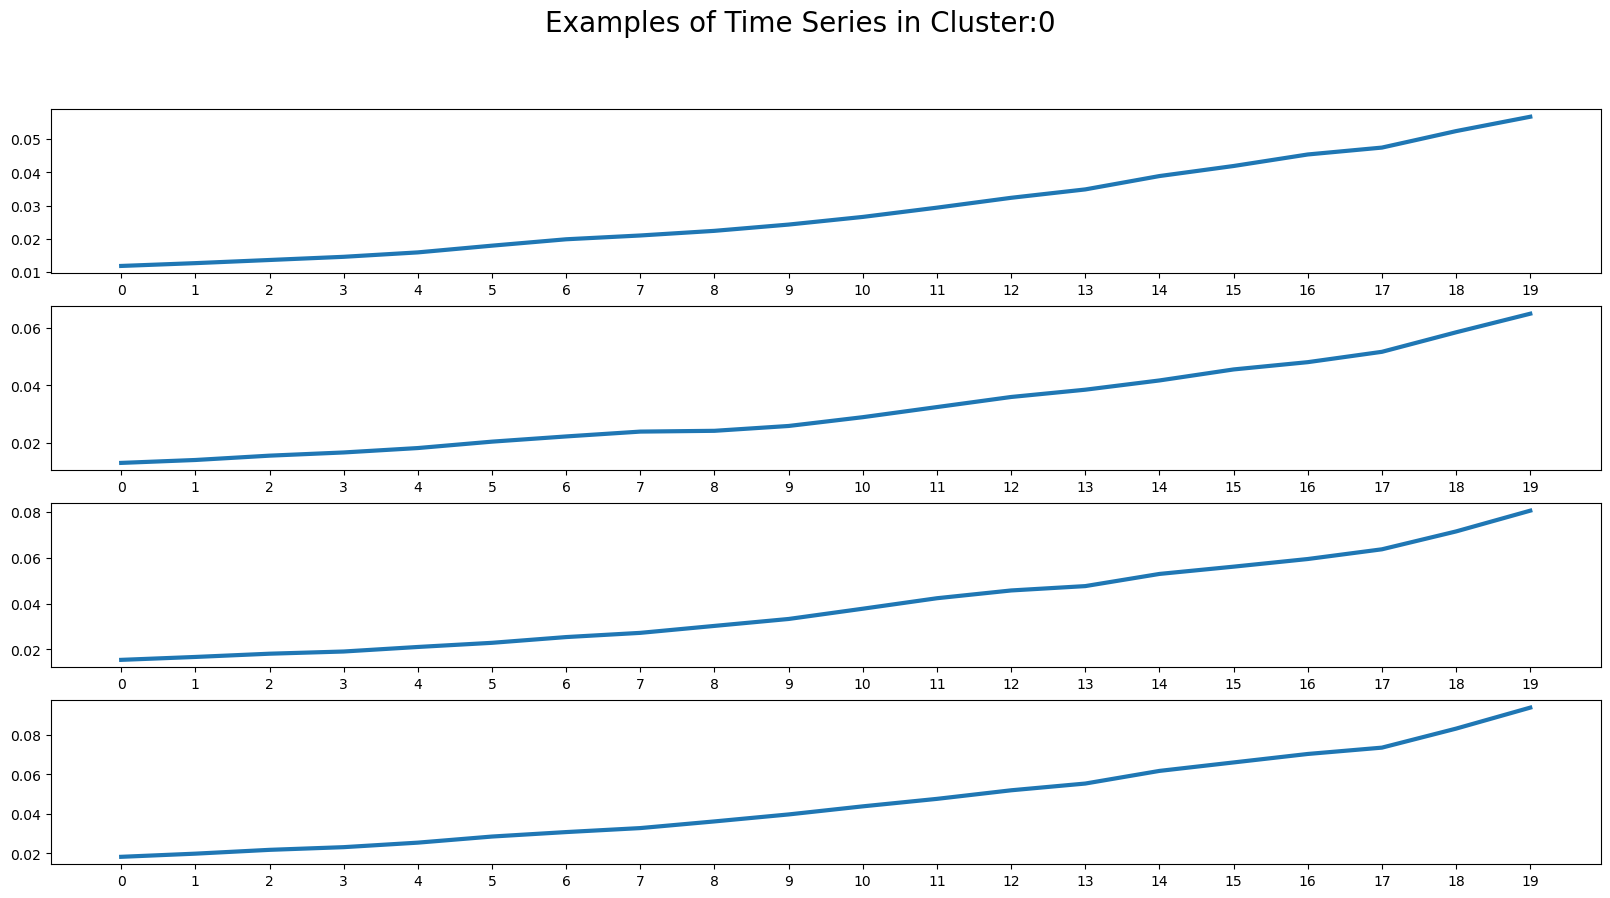

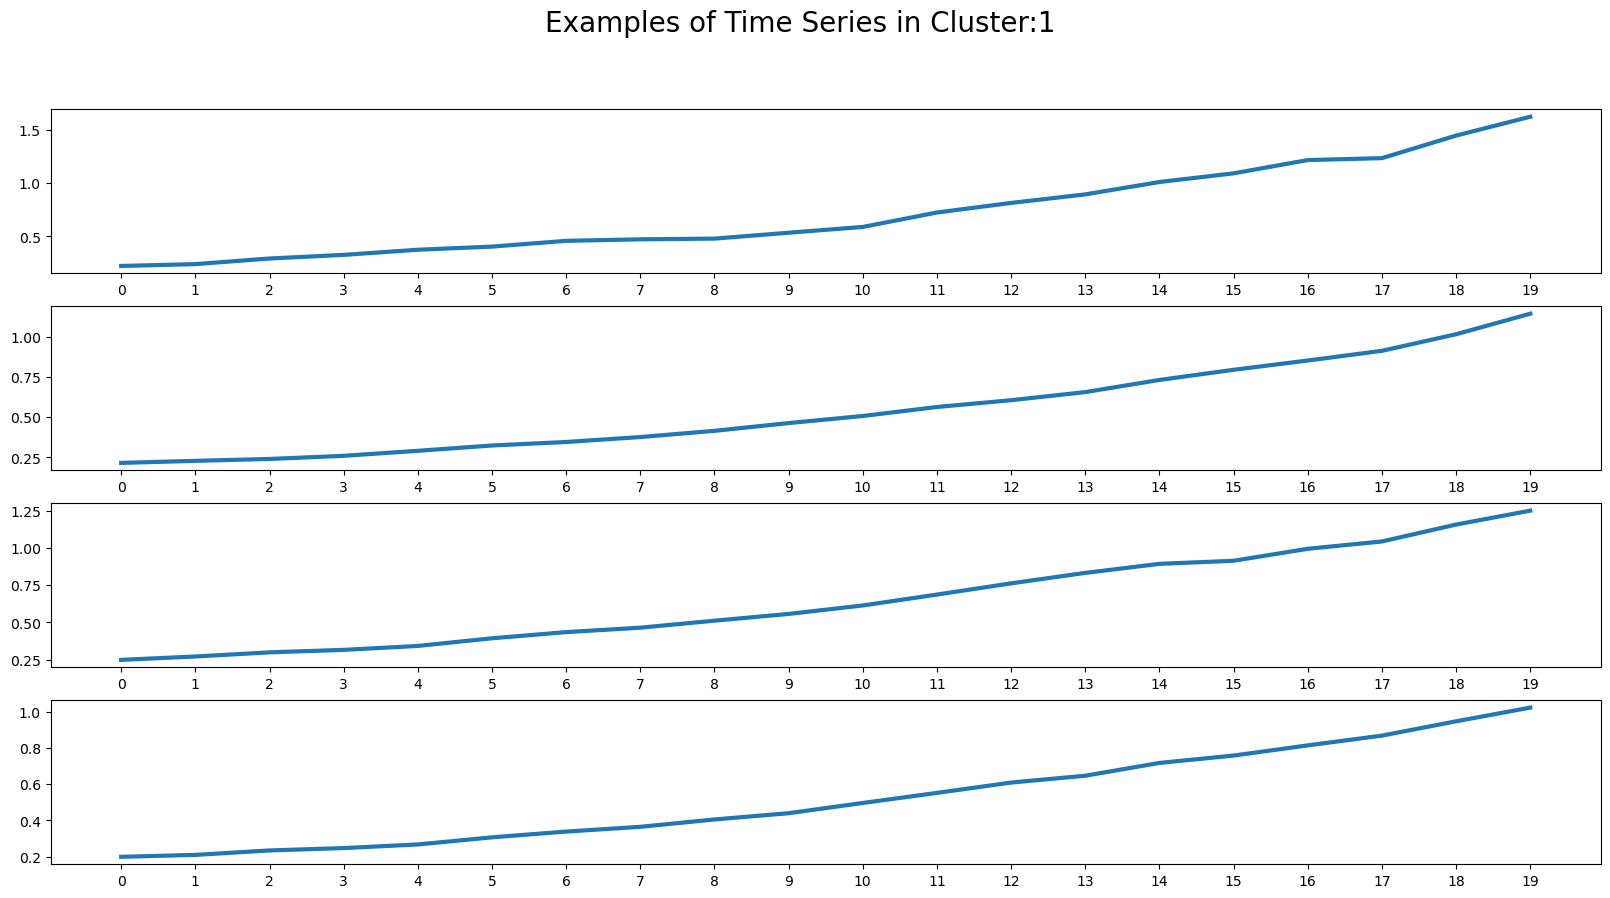

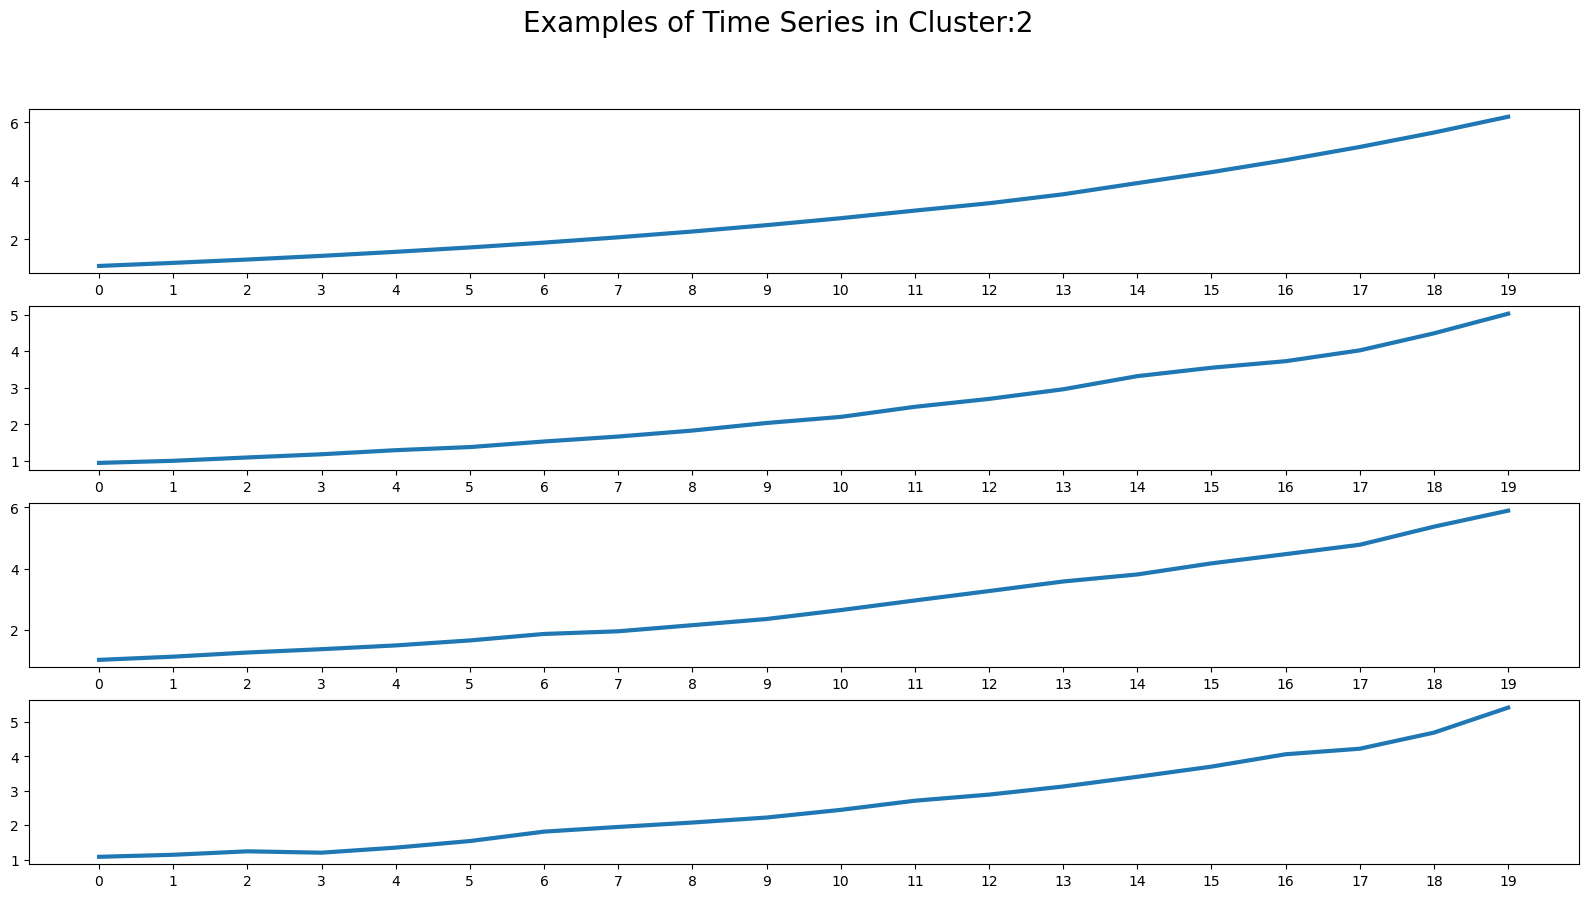

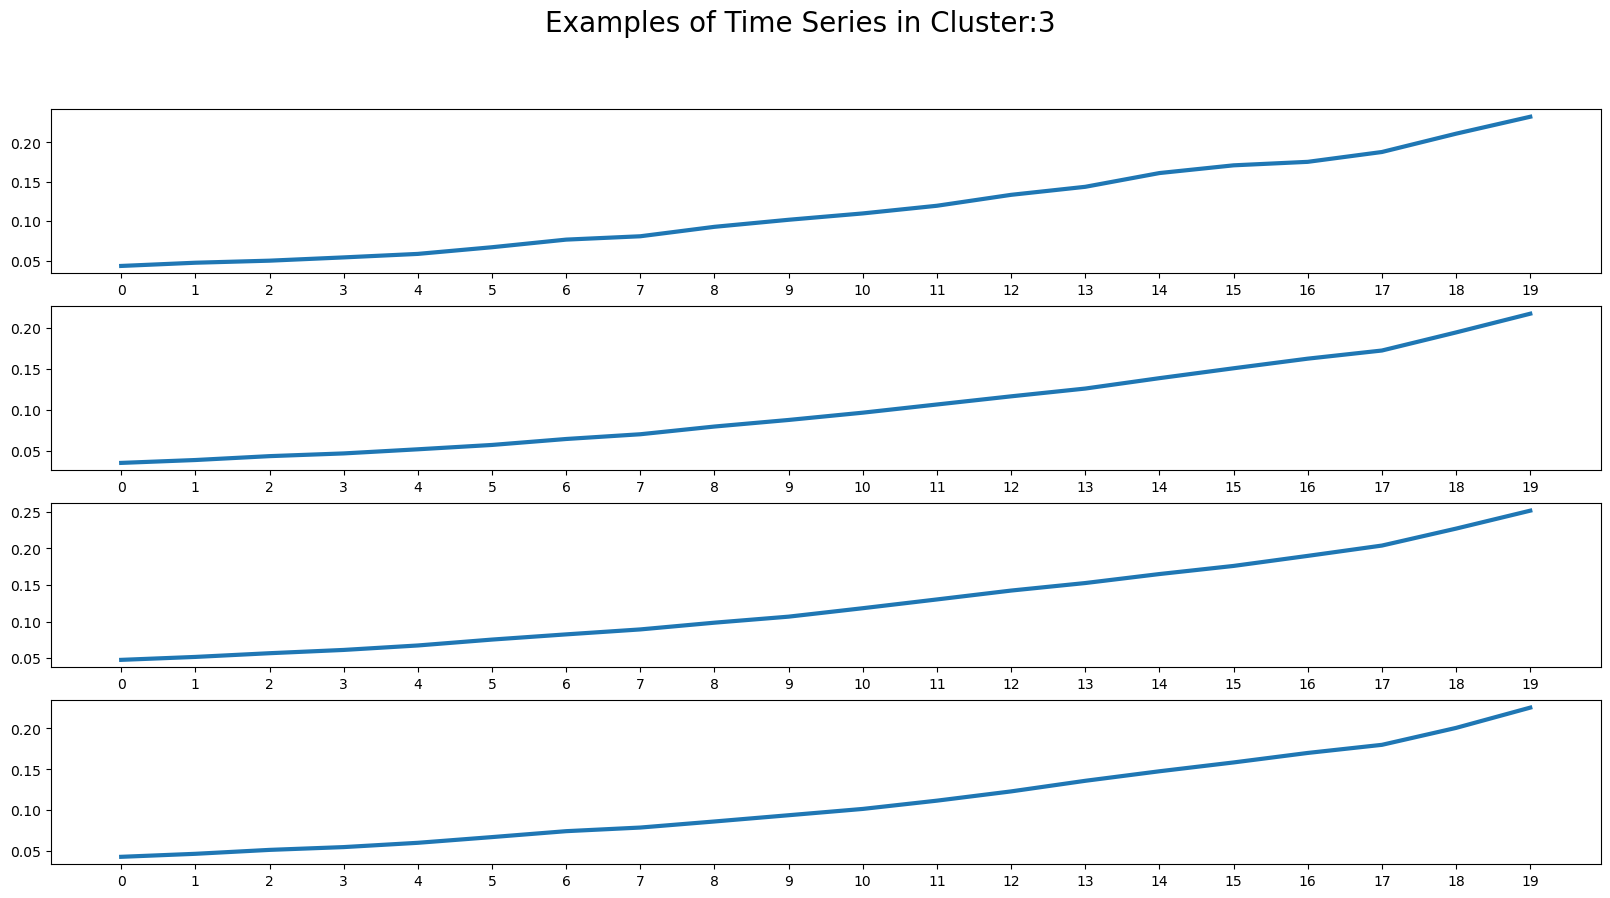

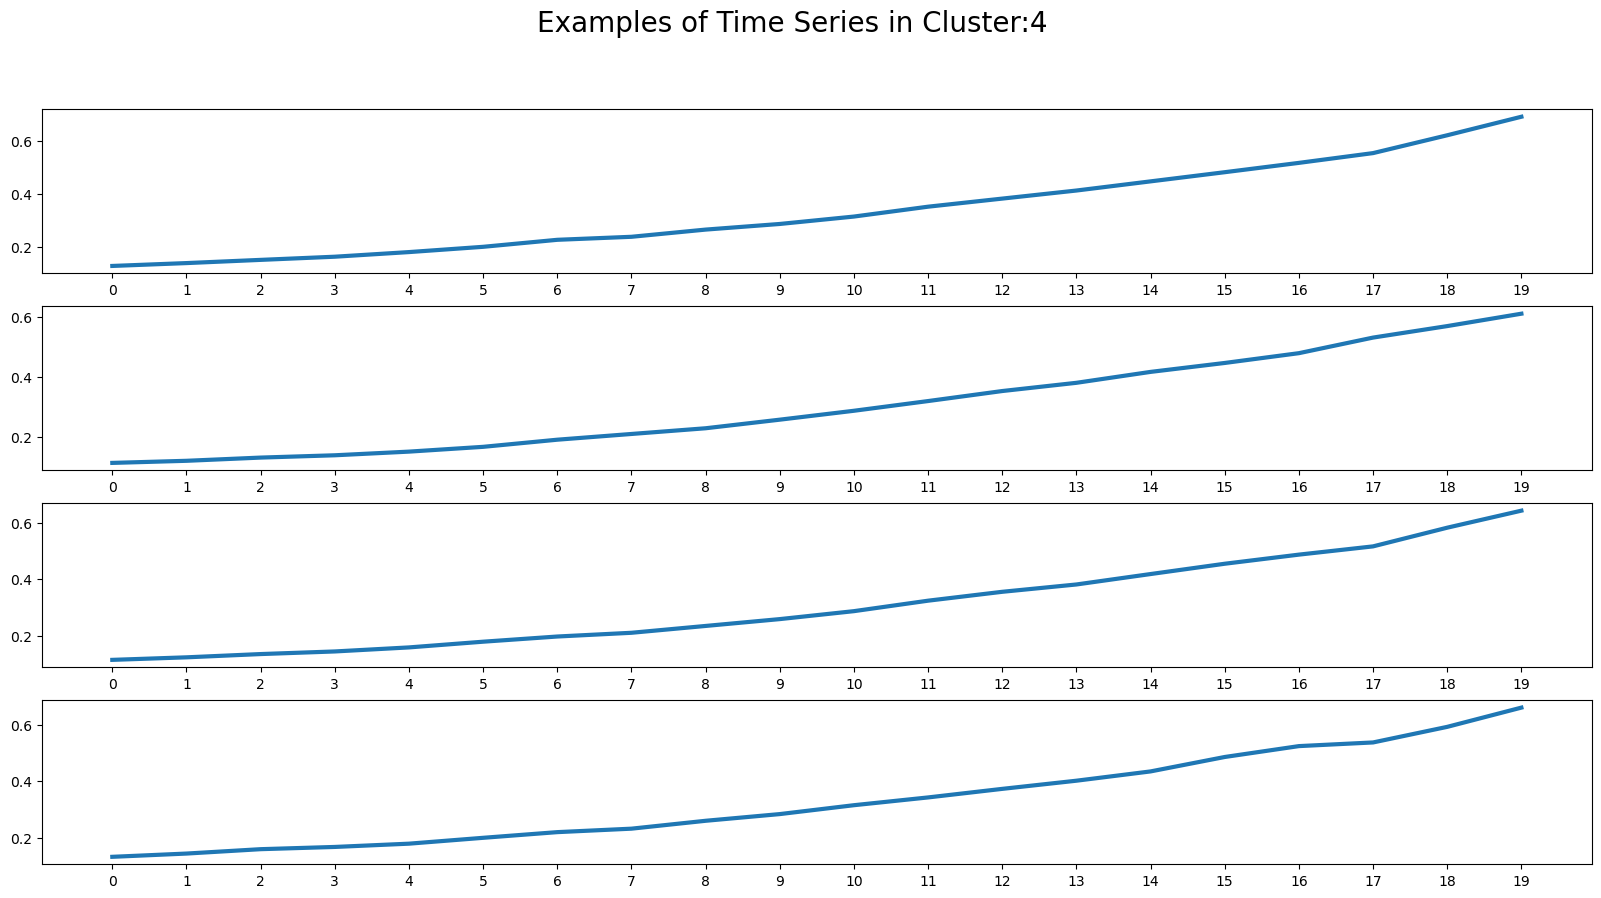

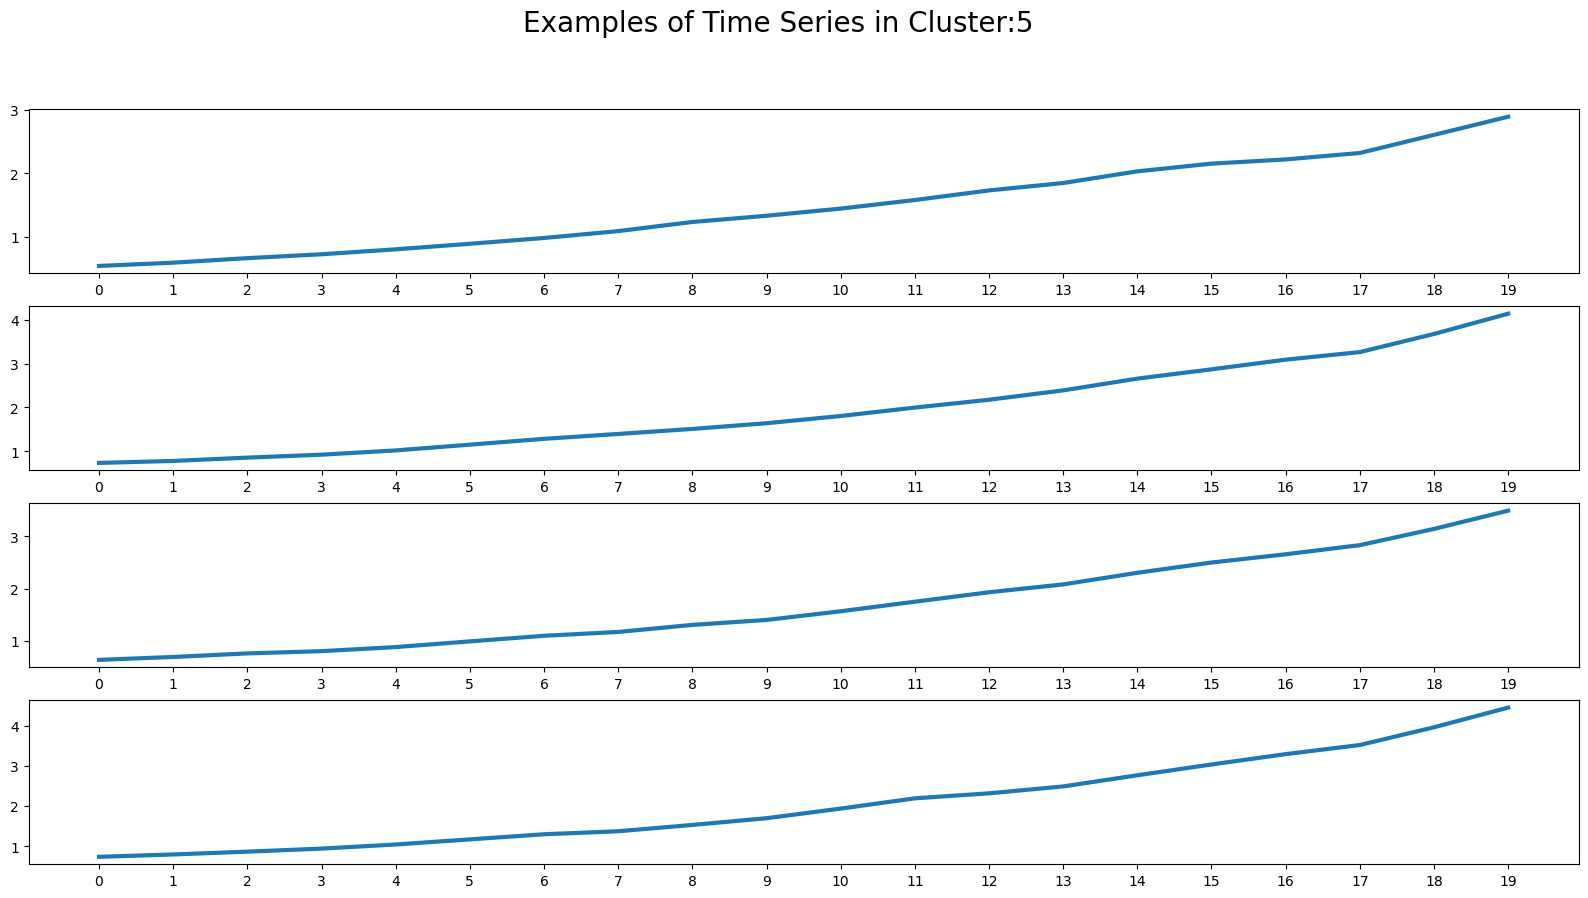

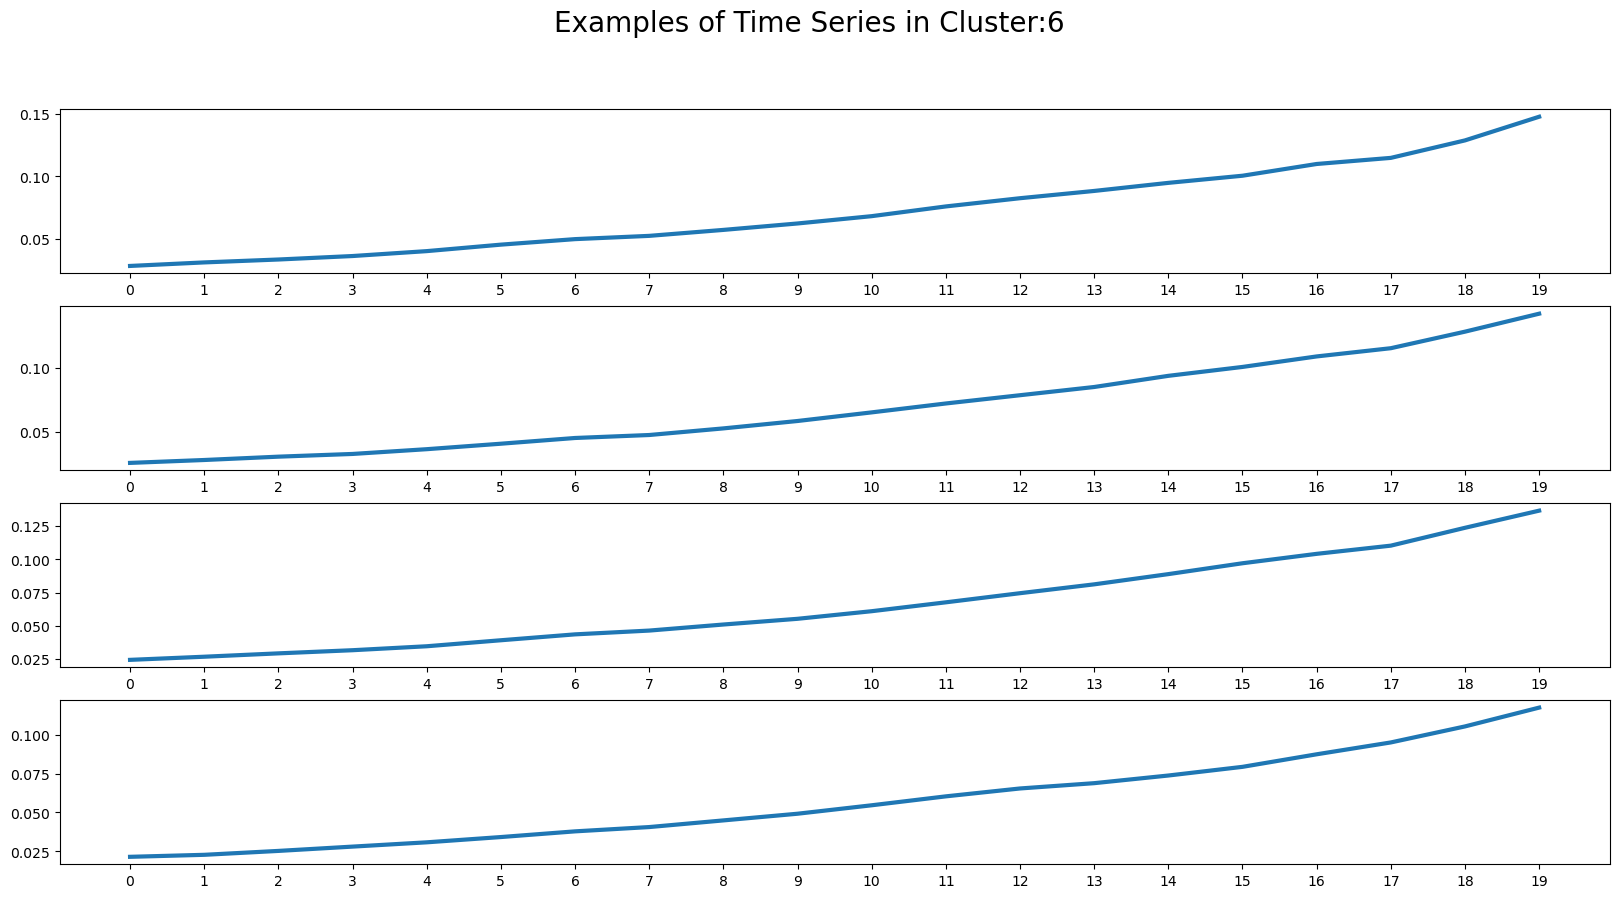

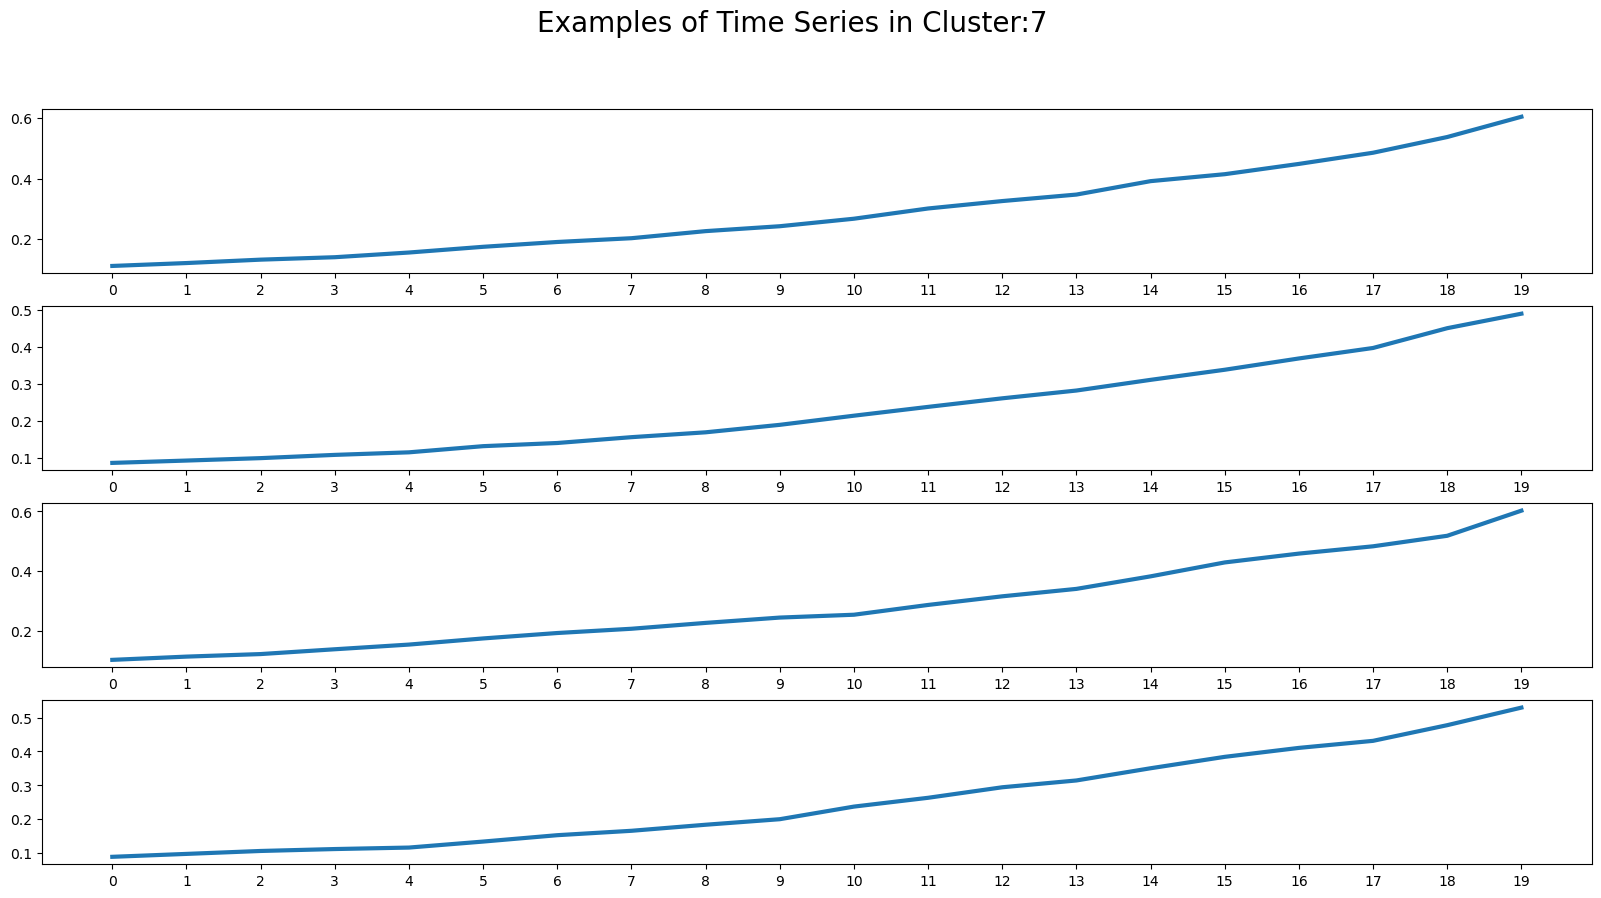

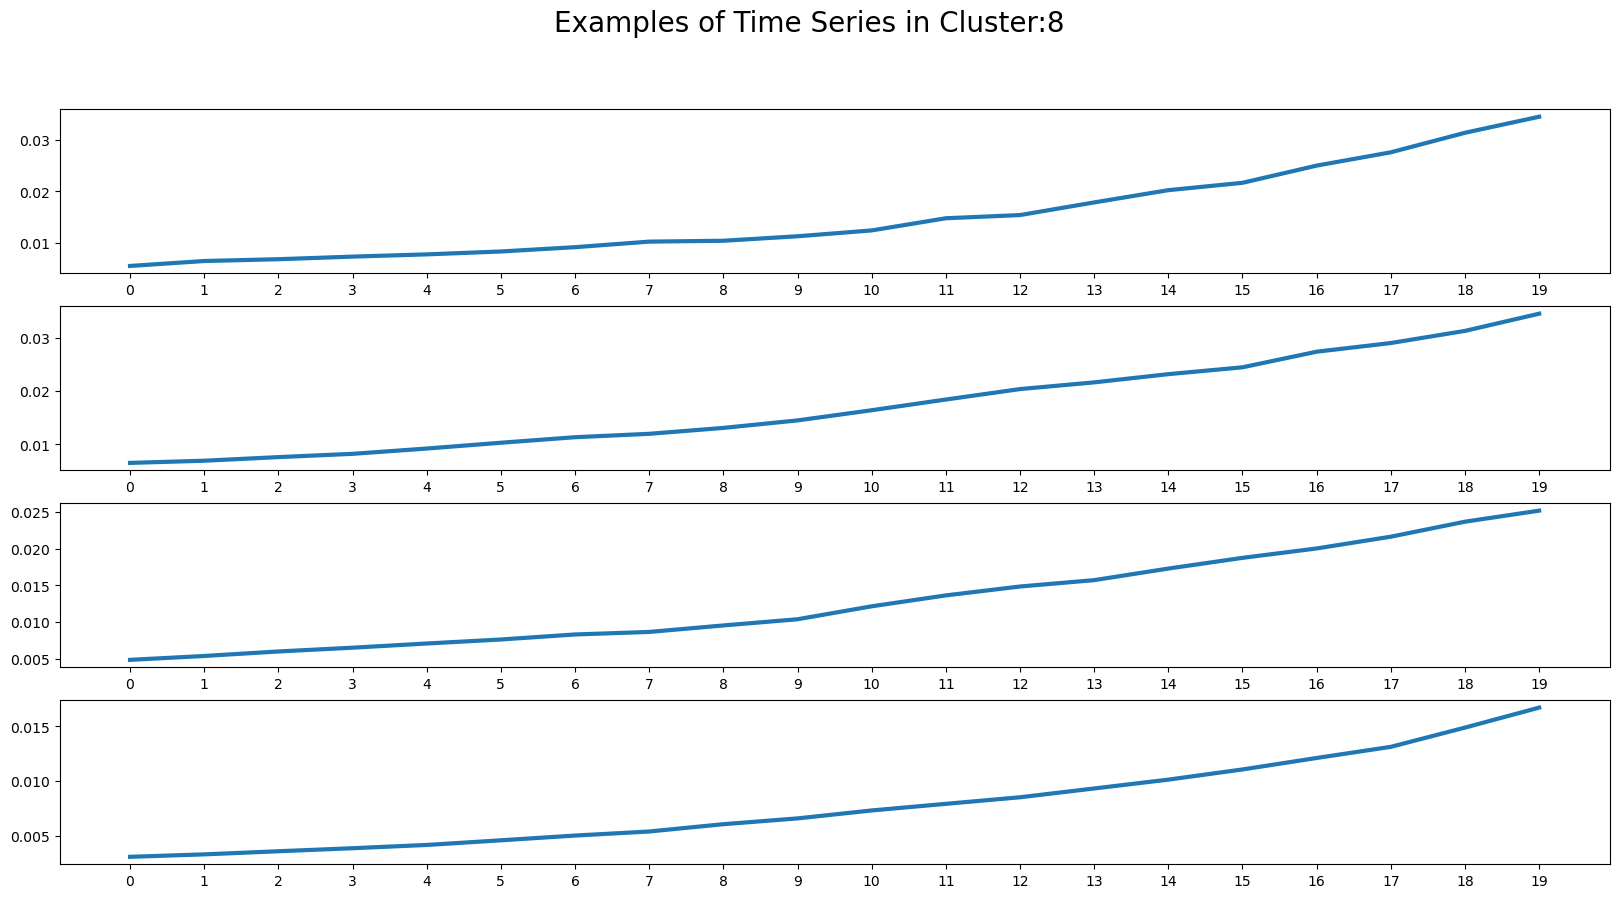

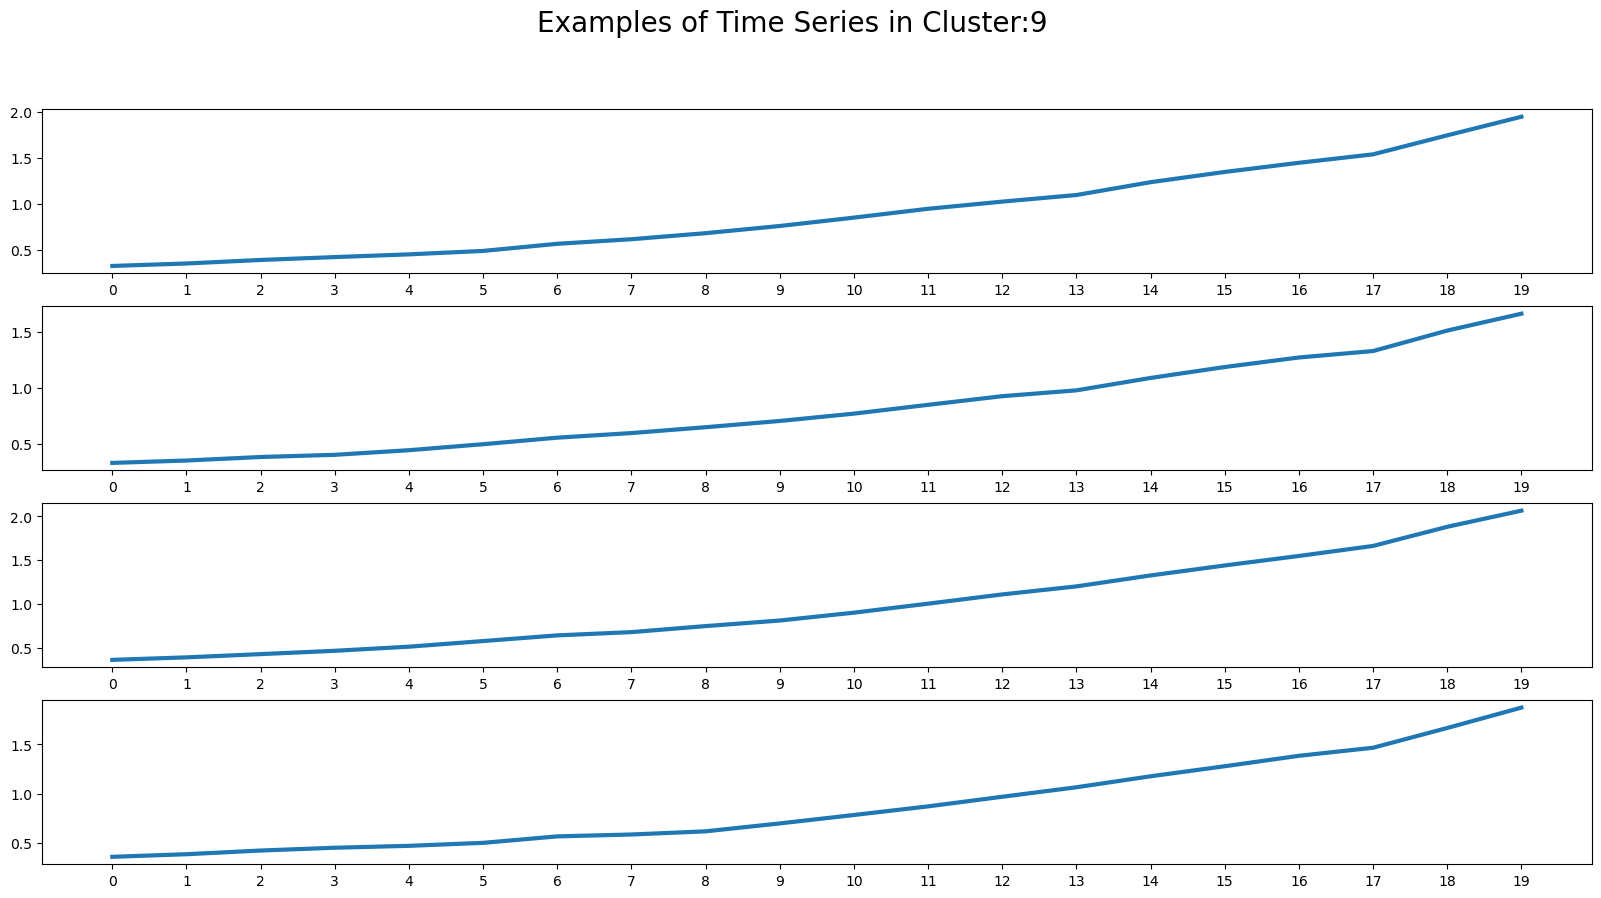

In [14]:
# We Look at the type of values that have been stored in cluster 1
for cluster_nb in range(10):
    indices = [i for i in range(len(labels1)) if labels1[i] == cluster_nb]
    fig, axes = plt.subplots(4, 1,figsize=(20,10), dpi=100)
    fig.suptitle('Examples of Time Series in Cluster:' + str(cluster_nb), fontsize=20)
    for i in range(4):
        axes[i].plot(X_data[indices[i]], linewidth=3)
        axes[i].set_xticks(ticks=np.arange(20))
    plt.show()
    fig.savefig("log_spaced_timeseries_kmeans_" + str(cluster_nb) + ".png", dpi=200)